# Performance Metrics

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

When we create a Machine Learning model we can do two types of models:

* Classification
* Regression

And for each type we have different metrics of performance.

# 1. Classification

### a. Confusion Matrix

First of all to introduce the Confusion Matrix we have to define the next terms: 

$ \ $

**TP:** True Positives (Predicted as Positive and Actually is Positive).

**TN:** True Negatives (Predicted as Negative and Actually is Negative).

**FP:** False Positives (Predicted as Positive and Actually is Negative).

**FN:** False Negative (Predicted as Negative and Actually is Positive).

![Captura de pantalla 2023-08-19 a la(s) 01.38.03.png](<attachment:Captura de pantalla 2023-08-19 a la(s) 01.38.03.png>)

From this Confusion Matrix we can define many metrics:

![Captura de pantalla 2023-08-19 a la(s) 01.38.14.png](<attachment:Captura de pantalla 2023-08-19 a la(s) 01.38.14.png>)

Other three metrics we can define are:

Accuracy = $ \cfrac{TP + TN}{TP + FN + FP + TN} $

f1 = $ \cfrac{2 \cdot precision \cdot recall}{precision + recall} $

f-$\beta$ = $ (1 + \beta^2) \cdot \cfrac{(precision \cdot recall)}{\beta^2 \cdot precision + recall} $

### Important Notes

* If you want minimize the Type II Error (FN) then you have to privilege **Recall**.
* If you want minimize the Type I Error (FP) then you have to privilege **Precision**.

### b. ROC-AUC curve

Remember that:

$ TPR = \cfrac{TP}{TP + FN} $

$ FPR = \cfrac{FP}{TN + FP} $

The ROC-AUC is create plotting in x-axis $FPR$ and the y-axis $TPR$ for each threshold.

**AUC** = (Area Under Curve)

### Example 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, auc)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame()
df['prob'] = [(i+1)/10 for i in range(10)]
df['y'] = [0, 0, 1, 0, 0, 1, 1, 1, 1, 1]

In [3]:
df

,prob,y
0,0.1,0
1,0.2,0
2,0.3,1
3,0.4,0
4,0.5,0
5,0.6,1
6,0.7,1
7,0.8,1
8,0.9,1
9,1.0,1


In [4]:
all_tpr = []
all_fpr = []
all_threshold = []

for t in range(0, 100 + 1):
    
    threshold = (t/100)

    df['y_pred'] = (df['prob'] >= threshold)*1

    TP = ((df['y_pred'] == df['y']) & (df['y'] == 1)).sum()
    TN = ((df['y_pred'] == df['y']) & (df['y'] == 0)).sum()

    FP = ((df['y_pred'] == 1) & (df['y'] == 0)).sum()
    FN = ((df['y_pred'] == 0) & (df['y'] == 1)).sum()

    TPR = TP/(TP + FN)
    FPR = FP/(FP + TN)
    
    all_tpr.append(TPR)
    all_fpr.append(FPR)

    all_threshold.append(threshold)

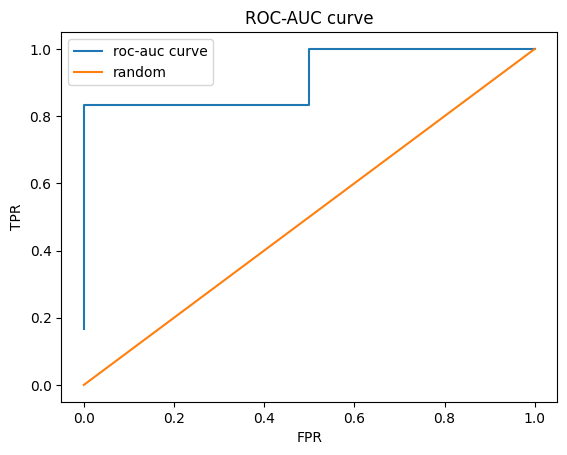

In [5]:
plt.plot(all_fpr, all_tpr, label = 'roc-auc curve')
plt.plot(all_threshold, all_threshold, label = 'random')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('ROC-AUC curve')
plt.legend()
plt.show()

In [6]:
AUC = (5/6)*(0.5 - 0.0) + 1.0*(1.0 - 0.5)

In [7]:
AUC

0.9166666666666667

You can use also libraries to plot the curve.

In [8]:
def roc_analysis(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)

    return roc_auc, fpr, tpr

In [9]:
auc, fpr, tpr = roc_analysis(df['y'], df['prob'])

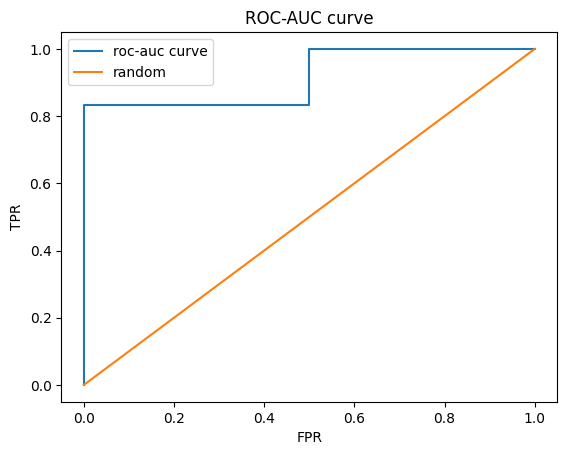

In [10]:
plt.plot(fpr, tpr, label = 'roc-auc curve')
plt.plot(all_threshold, all_threshold, label = 'random')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('ROC-AUC curve')
plt.legend()
plt.show()

In [11]:
auc

0.9166666666666667

### Example 2

We can compute all the other performance metrics using threshold = 0.6

In [12]:
df['y_pred'] = (df['prob'] >= 0.6)*1

In [13]:
df

,prob,y,y_pred
0,0.1,0,0
1,0.2,0,0
2,0.3,1,0
3,0.4,0,0
4,0.5,0,0
5,0.6,1,1
6,0.7,1,1
7,0.8,1,1
8,0.9,1,1
9,1.0,1,1


In [14]:
TP = ((df['y_pred'] == df['y']) & (df['y'] == 1)).sum()
TN = ((df['y_pred'] == df['y']) & (df['y'] == 0)).sum()

FP = ((df['y_pred'] == 1) & (df['y'] == 0)).sum()
FN = ((df['y_pred'] == 0) & (df['y'] == 1)).sum()

In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

**Accuracy**

In [16]:
(TP + TN)/(TP + TN + FP + FN)

0.9

In [17]:
accuracy_score(df['y'], df['y_pred'])

0.9

**Precision**

In [18]:
TP/(TP + FP)

1.0

In [19]:
precision_score(df['y'], df['y_pred'])

1.0

**Recall**

In [20]:
TP/(TP + FN)

0.8333333333333334

In [21]:
recall_score(df['y'], df['y_pred'])

0.8333333333333334

**F1**

In [22]:
(2*(5/6)*1.0)/((5/6) + 1.0)

0.9090909090909091

In [23]:
f1_score(df['y'], df['y_pred'])

0.9090909090909091

### Important Notes

* AUC = 0.5 is like toss a coin
* AUC < 0.5 is possible but you predict worst than toss a coin

### c. Relation AUC-Gini

![Captura de pantalla 2023-08-19 a la(s) 00.52.32.png](<attachment:Captura de pantalla 2023-08-19 a la(s) 00.52.32.png>)

$ AUC = \cfrac{Gini + 1}{2} $

$ Gini = 2 \cdot AUC - 1 $

### d. Strategy

i. To measure the capacity of classification of a model use **AUC**.

ii. Determine the threshold that optimize the metric you desire.

### e. Precision-Recall Curve

In [24]:
from sklearn.metrics import precision_recall_curve

In [25]:
all_precision = []
all_recall = []

for t in range(0, 100 + 1):
    
    threshold = (t/100)

    df['y_pred'] = (df['prob'] >= threshold)*1

    TP = ((df['y_pred'] == df['y']) & (df['y'] == 1)).sum()
    TN = ((df['y_pred'] == df['y']) & (df['y'] == 0)).sum()

    FP = ((df['y_pred'] == 1) & (df['y'] == 0)).sum()
    FN = ((df['y_pred'] == 0) & (df['y'] == 1)).sum()

    prec = TP/(TP + FP)
    reca = TP/(TP + FN)
    
    all_precision.append(prec)
    all_recall.append(reca)

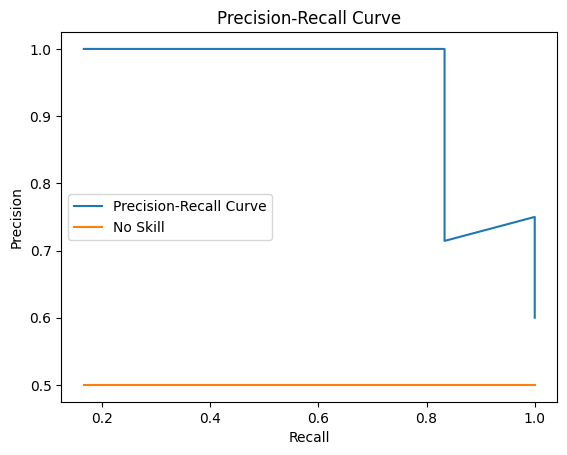

In [26]:
plt.plot(np.array(all_recall), np.array(all_precision), label = 'Precision-Recall Curve')
plt.plot(np.array(all_recall), (np.array(all_recall) >= 0)*0.5, label = 'No Skill')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall Curve')

plt.legend()
plt.show()

In [27]:
precision, recall, thresholds = precision_recall_curve(df['y'], df['prob'])

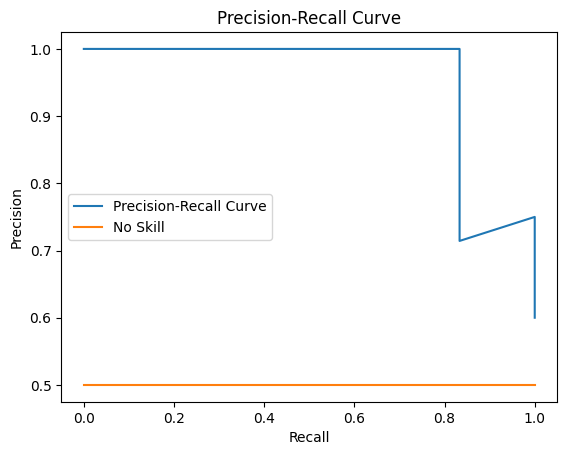

In [28]:
plt.plot(recall, precision, label = 'Precision-Recall Curve')
plt.plot(recall, (recall >= 0)*0.5, label = 'No Skill')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall Curve')

plt.legend()
plt.show()

### f. Multiclass

![Captura de pantalla 2023-08-19 a la(s) 01.14.50.png](<attachment:Captura de pantalla 2023-08-19 a la(s) 01.14.50.png>)

![Captura de pantalla 2023-08-19 a la(s) 01.15.40.png](<attachment:Captura de pantalla 2023-08-19 a la(s) 01.15.40.png>)

$ Accuracy = \cfrac{\text{all correct predictions}}{\text{all predictions}} $

### i. Metrics by classes

$ Precision_A = \cfrac{TP_A}{TP_A + FP_A} $

$ Recall_A = \cfrac{TP_A}{TP_A + FN_A} $

$ TP_A = 13 $, $ FP_A = 5 $, $ FN_A = 2 $

$ \Rightarrow $

$ Precision_A = \cfrac{13}{13 + 5} = \cfrac{13}{18} $

$ Recall_A = \cfrac{13}{13 + 2} = \cfrac{13}{15} $

### ii. Macro Average

$ Precision_{macro} = \cfrac{Precision_{A} + Precision_{B} + Precision_{C} + Precision_{D}}{4}$

$ $

$ $

$ Recall_{macro} = \cfrac{Recall_{A} + Recall_{B} + Recall_{C} + Recall_{D}}{4}$

### iii. Micro Average

$ Precision_{micro} = \cfrac{TP_{A} + TP_{B} + TP_{C} + TP_{D}}{TP_{A} + FP_{A} + TP_{B} + FP_{B} + TP_{C} + FP_{C} + TP_{C} + FP_{C}} $

$ $

$ Recall_{micro} = \cfrac{TP_{A} + TP_{B} + TP_{C} + TP_{D}}{TP_{A} + FN_{A} + TP_{B} + FN_{B} + TP_{C} + FN_{C} + TP_{C} + FN_{C}} $

# 2. Regression

The principal metrics for a regression problem are:

* MSE
* MAE
* MAPE

### a. MSE

$ MSE = \cfrac{1}{n} \cdot \sum_{i=1}^n (y_i - \hat{y}_i)^2 $

### b. MAE

$ MAE = \cfrac{1}{n} \cdot \sum_{i=1}^n |y_i - \hat{y}_i| $

### c. MAPE

$ MAPE = \cfrac{1}{n} \cdot \sum_{i=1}^n \cfrac{|y_i - \hat{y}_i|}{|y_i|} $